## Comments

- Need to add headers
- Separate data into X and Y beforehand?
- Get Spark to work
- Convert body into vector current version cannot accept non-numeric features

## Download and prep preprocessed data

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('parlers-data2/part-00000-4cd6e305-e7f2-4779-bc4b-8ef43772fdd0-c000 copy.csv')

train, val = train_test_split(df, test_size=0.3)
train, test = train_test_split(train, test_size=0.1)
print('%.2f %%' % float(len(train)/len(df)*100))
print('%.2f %%' % float(len(val)/len(df)*100))
print('%.2f %%' % float(len(test)/len(df)*100))

#Split the data into x and y
train_x = train[['Comments', 'Followers', 'Following', 'Reposts', 'verified']]
train_y = train['upvotes']
val_x = train[['Comments', 'Followers', 'Following', 'Reposts', 'verified']]
val_y = train['upvotes']
test_x = train[['Comments', 'Followers', 'Following', 'Reposts', 'verified']]
test_y = train['upvotes']

61.02 %
30.51 %
8.47 %


## Potential stats/data visualizations

['Comments', 'createdAt', 'Followers', 'Following', 'Impressions', 'Reposts', 'upvotes', 'length']


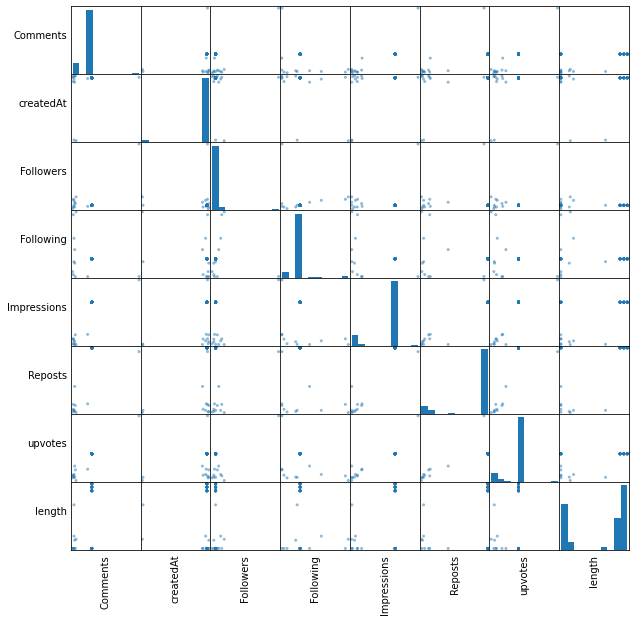

In [71]:
numeric_features = [c for c in df.columns if df[c].dtypes == 'int64' or df[c].dtypes == 'float64']
#print(numeric_features)
sampled_data = df[numeric_features]
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Comments,59.0,2.615254e+01,1.330519e+01,1.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,9.800000e+01
createdAt,59.0,2.020045e+13,1.855962e+09,2.019060e+13,2.020080e+13,2.020080e+13,2.020080e+13,2.020110e+13
Followers,59.0,2.610508e+04,3.772006e+04,4.200000e+03,2.000000e+04,2.000000e+04,2.000000e+04,3.050000e+05
Following,59.0,2.576839e+04,1.432041e+04,2.100000e+01,2.500000e+04,2.500000e+04,2.500000e+04,9.100000e+04
Impressions,59.0,1.625020e+04,6.755893e+03,2.800000e+01,1.900000e+04,1.900000e+04,1.900000e+04,2.900000e+04
Reposts,59.0,1.105593e+02,4.124789e+01,1.000000e+01,1.290000e+02,1.290000e+02,1.290000e+02,1.290000e+02
upvotes,59.0,1.081864e+02,4.004974e+01,9.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,2.780000e+02
length,57.0,2.540475e+05,1.831459e+05,-1.000000e+00,-1.000000e+00,3.665340e+05,3.899360e+05,4.114450e+05


In [70]:
df.head()

,Article,Body,Comments,createdAt,createdAtFormatted,Creator,Datatype,Followers,Following,Hashtags,...,Reposts,Sensitive,shareLink,upvotes,verified,domain,long,length,mimeType,site
0,False,‪ CHILLS! \n\nI loved hearing Airforce Technic...,2,2.020020e+13,2020-02-16 23:15:56 UTC,59501f9de23142fdbecee0b6592eb17f,posts,12000,2900,daytona500,...,16,False,https://parler.com/post/f2c55d1b981e4e109863cd...,31,False,twitter.com,https://twitter.com/Jamierodr14/status/1229138...,-1.0,text/html,NaN
1,True,NaN,5,2.020110e+13,2020-11-17 18:35:01 UTC,785e1ba73a2e4cafab4b3fc237f9b760,posts,28000,21,NaN,...,23,False,https://parler.com/post/badf53315b9a4fc895d3f4...,53,False,gellerreport.com,https://gellerreport.com/2020/11/biden-appoint...,-1.0,text/html,NaN
2,True,Petraeus Says Trump May Have Restored U.S. 'De...,4,2.020010e+13,2020-01-05 15:31:17 UTC,d75254e22386401c9a0a98d365eb2346,posts,34000,38000,NaN,...,58,False,https://parler.com/post/faffec7af75b46c7b7371b...,69,False,foreignpolicy.com,https://foreignpolicy.com/2020/01/03/petraeus-...,-1.0,text/html,@ForeignPolicy
3,True,Hillary Clinton Calls Bernie Sanders a Sore Lo...,6,2.019060e+13,2019-06-03 17:11:27 UTC,9675e836a8c8467e8177744044cb58b0,posts,59000,91000,NaN,...,10,False,https://parler.com/post/504c868b51814a07b5a77b...,9,False,breitbart.com,https://www.breitbart.com/politics/2019/06/03/...,58271.0,text/html,@BreitbartNews
4,False,💥 NOW COMES THE PAIN 💥\n\nWe just needed proof...,3,2.020060e+13,2020-06-24 17:55:00 UTC,cd894aedf8a0406c87b06bbae97fe750,posts,43000,54000,NaN,...,14,False,https://parler.com/post/416ce8753fe54f4b915968...,34,False,media0.giphy.com,https://media0.giphy.com/media/CufLv1T7gIPC/20...,78332.0,image/gif,media0.giphy.com


## Model Building

In [145]:
def linear_reg_model(train_x, train_y, val_x, val_y):
    
    model = linear_model.LinearRegression()

    # Train the model using the training sets
    model.fit(train_x, train_y)

    # Make predictions using the validation set
    val_y_pred = model.predict(val_x)
    val_y_pred = pd.DataFrame(val_y_pred, columns=['val_predicted_upvotes'])
    val_comparison = val_y_pred.join(val_y)
    
    return model, val_y_pred, val_comparison


In [159]:
def linear_reg_test(model, test_x, test_y):
    # Make predictions using the test set
    test_y_pred = model.predict(test_x)
    test_y_pred = pd.DataFrame(test_y_pred, columns=['test_predicted_upvotes'])
    test_comparison = test_y_pred.join(test_y)
    
    return test_y_pred, test_comparison

## Metrics

In [165]:
# Metrics
def linear_reg_metrics(model, y_pred, y_true, comparison):
    groundtruth = comparison.to_numpy()
    acc = [i for i in groundtruth if i[0] == i[1]]
    acc = len(acc)

    print('Accuracy: %.2f %%' % float(acc/len(y_true)*100))


    print('Coefficients: \n', model.coef_)
    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_true, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_true, y_pred))


In [166]:
regr, val_y_pred, val_comparison = linear_reg_model(train_x, train_y, val_x, val_y)
print('VALIDATION METRICS')
linear_reg_metrics(regr, val_y_pred, val_y, val_comparison) 
test_y_pred, test_comparison = linear_reg_test(regr, test_x, test_y)
print()
print('TEST METRICS')
linear_reg_metrics(regr, test_y_pred, test_y, test_comparison) 


VALIDATION METRICS
Accuracy: 0.00 %
Coefficients: 
 [-7.29672444e-01  8.13392524e-04 -5.46361914e-04  9.93097233e-01
  0.00000000e+00]
Mean squared error: 2.48
Coefficient of determination: 1.00

TEST METRICS
Accuracy: 0.00 %
Coefficients: 
 [-7.29672444e-01  8.13392524e-04 -5.46361914e-04  9.93097233e-01
  0.00000000e+00]
Mean squared error: 2.48
Coefficient of determination: 1.00
